# Lab 1 

In [146]:
%matplotlib inline 

import matplotlib
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image
import inspect
import scipy.stats as st

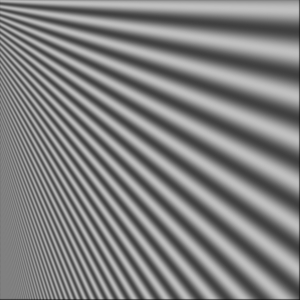

In [23]:
a = Image.open('pn1.jpg')
asarr = np.asarray(a)
a

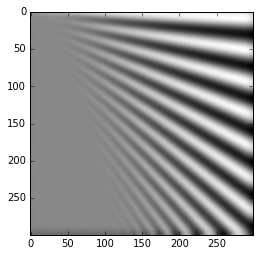

In [71]:
from scipy.ndimage.filters import gaussian_filter
blurred = gaussian_filter(a, sigma=5)
plt.imshow(blurred,cmap="gray")

In [235]:
g_kernel = np.asarray([[1,2,1],
                       [2,4,2],
                       [1,2,1]])
g2_kernel = np.asarray([[1,2,1],
                       [2,4,2],
                       [1,2,1]])
n_kernel = np.asarray([[1,1,1],
                       [1,1,1],
                       [1,1,1]])
n7_kernel = np.ones((7,7))

def applyFilter(img_path,kernel,is_path = True,debug=False):
    if not is_path:
        asarr = img_path
    else:
        a = Image.open(img_path)
        asarr = np.asarray(a)
    plt.figure()
    plt.imshow(asarr,cmap="gray",interpolation="nearest")
    plt.figure()
    ret = tryFilter(asarr,kernel,debug)
    plt.imshow(ret,cmap="gray",interpolation="nearest")
    return ret

def tryFilter(img,k,debug=False):
    if k.shape[0]%2 == 0 or k.shape[1]%2 == 0:
        print("Kernel should be symmetrical (odd dimensions)")
        return None
    #return_image = np.zeros(img.shape)
    
    row = 0
    col = 0
    if debug:
        print("RANGE:",img.shape[0] - int(k.shape[0]))
    percent_complete = 0
    last_percent = 0
    while row < img.shape[0] - int(k.shape[0])+1:
        col = 0
        percent_complete = int((row*100)/(img.shape[0] - int(k.shape[0])))
        if debug and percent_complete%10 == 0 and last_percent!= percent_complete:
            last_percent = percent_complete
            print("Progress:",last_percent,"%")
        while col < img.shape[1] - int(k.shape[1])+1:
            c_row = row + int(k.shape[0]/2)
            c_col = col + int(k.shape[1]/2)
            if debug:
                print("TOP-left:",(row,col), "Center:",(c_row,c_col))
            img[c_row,c_col] = calculateFilter(img,k,(row,col))
            col = col+1
        row = row+1
    return img

def calculateFilter(img,k,topleft):
    row,col = topleft
    i = 0
    j = 0
    sum = 0
    while i<k.shape[0]:
        j=0
        while j<k.shape[1]:
            sum = sum + (img[row+i][col+j] * k[i][j])
            j = j+1
        i = i+1
    return sum/(k.shape[0]*k.shape[1])

def convertToGrayscale(image_path):
    pp = Image.open(image_path)
    x = np.asarray(pp)
    return x[:,:,0]


def gkern(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel array."""

    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    #kernel = kernel_raw/kernel_raw.sum()
    kernel = kernel_raw
    return kernel

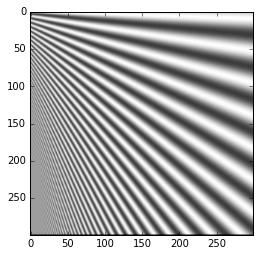

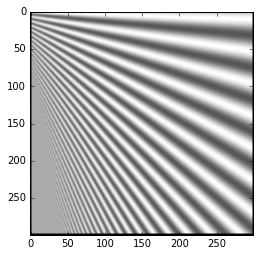

In [131]:
g_img = applyFilter('pn1.jpg',g_kernel)

RANGE: 505
Progress: 10 %
Progress: 20 %
Progress: 30 %
Progress: 40 %
Progress: 50 %
Progress: 60 %
Progress: 70 %
Progress: 80 %
Progress: 90 %


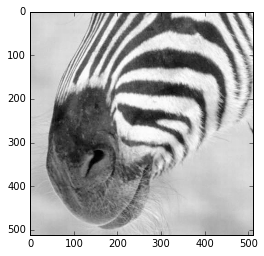

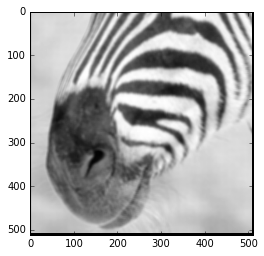

In [189]:
z_img = applyFilter(convertToGrayscale('zebra.png'),n7_kernel,is_path=False,debug=True)
# plt.imshow(gaussian_filter(Image.open('zebra.png'),sigma=7))

RANGE: 503
Progress: 10 %
Progress: 20 %
Progress: 30 %
Progress: 40 %
Progress: 50 %
Progress: 60 %
Progress: 70 %
Progress: 80 %
Progress: 90 %


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

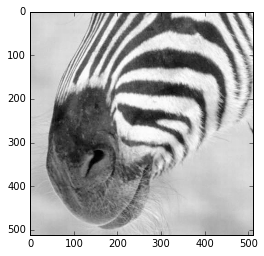

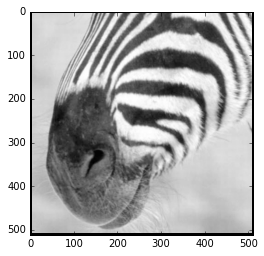

In [192]:
applyFilter(convertToGrayscale('zebra.png'),gkern(21,7),is_path=False,debug=True)

In [270]:
x = gkern(5,1)*100


array([[ 12.0894953 ,  14.74083769,  15.74799494,  14.74083769,  12.0894953 ],
       [ 14.74083769,  17.97364492,  19.20168142,  17.97364492,
         14.74083769],
       [ 15.74799494,  19.20168142,  20.51362264,  19.20168142,
         15.74799494],
       [ 14.74083769,  17.97364492,  19.20168142,  17.97364492,
         14.74083769],
       [ 12.0894953 ,  14.74083769,  15.74799494,  14.74083769,  12.0894953 ]])